<a href="https://colab.research.google.com/github/Enoque12/Analise_TelecomX_Challenge2/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [57]:
import requests
import pandas as pd
import json

In [58]:
url = 'https://raw.githubusercontent.com/Enoque12/Analise_TelecomX_Challenge2/refs/heads/main/Dados_API/TelecomX_Data.json'

In [59]:
dados = requests.get(url)

In [60]:
resultados = json.loads(dados.text)

In [61]:
df = pd.json_normalize(resultados)

In [62]:
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [63]:
colunas = df.columns
nomeColunasactual = ['customerID', 'Churn','gender', 'SeniorCitizen','Partner',
                     'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                     'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

In [64]:
for i in range(len(colunas)):
  df = df.rename(columns={colunas[i]:nomeColunasactual[i]})

In [65]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformação

##**Conhecendo o DataSet**

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Acções necessárias:
- Verificar e remover duplicados
- Valores vazios
- Nulos
- Tipos de Dados
- Valores atipícos
- Consistencia e validez de dados categoricos
- Normalização de Textos

Verificar e remover duplicados

In [67]:
print(f'A quantidade de valores duplicados no DF é: {df.duplicated().sum()}')

A quantidade de valores duplicados no DF é: 0


Consistencia e validez de dados categoricos

In [68]:
colunas = df.columns

for col in colunas:
  print('---------------------------------------------')
  print(f'Os valores únicos da Coluna "{col}": \n{df[col].unique()}')
  print('---------------------------------------------')

---------------------------------------------
Os valores únicos da Coluna "customerID": 
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "Churn": 
['No' 'Yes' '']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "gender": 
['Female' 'Male']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "SeniorCitizen": 
[0 1]
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "Partner": 
['Yes' 'No']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "Dependents": 
['Yes' 'No']
---------------------------------------------
---------------------------------------------
Os

Somatório dos Vazios e nulos

In [69]:
for col in colunas:
  quantVazio = 0
  for valor in df[col]:
    if str(valor).strip() == '':
      quantVazio += 1
  if quantVazio > 0:
    print(f'A quantidade de valores vazios na Coluna "{col}" é: {quantVazio}')


A quantidade de valores vazios na Coluna "Churn" é: 224
A quantidade de valores vazios na Coluna "Charges.Total" é: 11


Tornando os dados consistentes e normalizados

In [70]:
df_novo = df.copy()

In [71]:
df_novo['Churn'] = df_novo['Churn'].str.replace('NoNNooNo', 'No')

In [72]:
df_novo[df_novo['Charges.Total'].str.strip() == '']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [73]:
def padronizaYesNo(df, coluna):
  df[coluna] = df[coluna].str.replace('Yes','1').replace('No','0')
  return df[coluna]

def converteParaInt(df, coluna):
  df[coluna] = df[coluna].astype(int)
  return df[coluna]

def colunasNoServe(df, colunas, tipoServico):
  df[coluna] = df[coluna].str.replace(tipoServico, 'No')
  return df[coluna]

def removeVazios(df, coluna):
  for i in range(len(df[coluna])):
    if str(df[coluna].iloc[i]).strip() == '':
      df[coluna][i] = 0
  return df[coluna]

In [235]:
df_novo['Charges.Total'] = removeVazios(df_novo, 'Charges.Total')


In [75]:
listaColunasNoServe = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
listaServicos = ['No phone service', 'No internet service']

for coluna in listaColunasNoServe:
  if coluna == 'MultipleLines':
    df_novo[coluna] = colunasNoServe(df_novo, coluna, listaServicos[0])
  else:
    df_novo[coluna] = colunasNoServe(df_novo, coluna, listaServicos[1])

In [76]:
df_novo

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [77]:
colunas = df_novo.columns

for col in colunas:
  print('---------------------------------------------')
  print(f'Os valores únicos da Coluna "{col}": \n{df_novo[col].unique()}')
  print('---------------------------------------------')

---------------------------------------------
Os valores únicos da Coluna "customerID": 
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "Churn": 
['No' 'Yes' '']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "gender": 
['Female' 'Male']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "SeniorCitizen": 
[0 1]
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "Partner": 
['Yes' 'No']
---------------------------------------------
---------------------------------------------
Os valores únicos da Coluna "Dependents": 
['Yes' 'No']
---------------------------------------------
---------------------------------------------
Os

In [78]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [80]:
df_novo['Charges.Total'] = df_novo['Charges.Total'].astype(float)

Convertendo a coluna `Churn` para boolean

In [81]:
df_novo['Churn'] = padronizaYesNo(df_novo, 'Churn')

In [82]:
df_novo

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Padronizando os Yes e No para 1 e 0

In [83]:
df_aux = df_novo.copy()

In [84]:
listaColunasPadronizadas = ['MultipleLines',
                            'OnlineSecurity',
                            'OnlineBackup',
                            'DeviceProtection',
                            'TechSupport',
                            'StreamingTV',
                            'StreamingMovies',
                            'Partner',
                            'Dependents',
                            'PhoneService',
                            'PaperlessBilling']

for coluna in listaColunasPadronizadas:
  df_novo[coluna] = padronizaYesNo(df_novo, coluna)

In [235]:
df_novo['Churn'] = removeVazios(df_novo, 'Churn')

In [86]:
df_novo['Churn'] = df_novo['Churn'].astype(int)

In [87]:
for coluna in listaColunasPadronizadas:
  df_novo[coluna] = converteParaInt(df_novo, coluna)

In [88]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [89]:
df_novo

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


Renomeando e traduzindo as colunas do meu DataFrame

In [90]:
colunas_traduzidas = [
    'ID_Cliente',                # customerID
    'Evasao',                    # Churn
    'Genero',                    # gender
    'Idoso',                     # SeniorCitizen
    'Possui_Parceiro',           # Partner
    'Possui_Dependentes',        # Dependents
    'Meses_De_Contrato',         # tenure
    'Servico_Telefonico',        # PhoneService
    'Multiplas_Linhas',          # MultipleLines
    'Servico_Internet',          # InternetService
    'Seguranca_Online',          # OnlineSecurity
    'Backup_Online',             # OnlineBackup
    'Protecao_Dispositivo',      # DeviceProtection
    'Suporte_Tecnico',           # TechSupport
    'Streaming_TV',              # StreamingTV
    'Streaming_Filmes',          # StreamingMovies
    'Tipo_Contrato',             # Contract
    'Fatura_Papel',              # PaperlessBilling
    'Metodo_Pagamento',          # PaymentMethod
    'Gasto_Mensal',              # Charges.Monthly
    'Gasto_Total'                # Charges.Total
]

for i in range(len(colunas_traduzidas)):
  df_novo = df_novo.rename(columns={colunas[i]:colunas_traduzidas[i]})

In [91]:
df_novo

,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_De_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Gasto_Mensal,Gasto_Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


Criando a coluna Contas Diárias

In [92]:
df_novo['Gasto_Diario'] = round(df_novo['Gasto_Mensal'] / 30, 2)

In [93]:
df_novo.head()

,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_De_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Gasto_Mensal,Gasto_Total,Gasto_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [94]:
df_novo.to_json('dados_tratados.json', index=False)

#📊 Carga e análise

## Análise descritiva

In [95]:
df_novo.describe()

,Evasao,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_De_Contrato,Servico_Telefonico,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Fatura_Papel,Gasto_Mensal,Gasto_Total,Gasto_Diario
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


## Distribuição da Evasão

In [96]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [97]:
df_novo['Evasao'].value_counts()

,count
Evasao,
0,5398
1,1869


Gráfico da Distribuição da Evasão

In [98]:
labels = ['Não Evasão','Evasão']
values = df_novo['Evasao'].value_counts()

# Create subplots: use 'domain' type for Pie subplot
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    pull=[0, 0.01],
    name="Distribuição da Evasão")])

# Use `hole` to create a donut-like pie chart
fig.update_traces(
    hole=.4,
    hoverinfo="label+percent")

fig.update_layout(
    title_text="Distribuição da Evasão",
    title_font_size=20,
    title_font_weight='bold',
    title_x=0.5,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Evasão',
                      x=0.5,
                      y=0.5,
                      font_size=20,
                      font_weight='bold',
                      showarrow=False,
                      xanchor="center")])

fig.show()

Com o seguinte gráfico conseguimos perceber que mais de 25,7% sairam da empresa e os 74,3% permanecem ainda na empresa. Essas percentagem correspondem a um número de 1869 clientes que sairam, em relação a um número de 5398 clientes que ainda permanecem na Empresa.

## Contagem de Evasão por Variáveis Categóricas

Por gênero

In [99]:
quant_1s = df_novo.query('Evasao == 1').groupby('Genero').size().reset_index()

In [100]:
quant_0s = df_novo.query('Evasao == 0').groupby('Genero').size().reset_index()

In [101]:
distri_genero = pd.merge(quant_1s, quant_0s, on='Genero')

In [102]:
distri_genero.columns = ['Genero','Evasao','Não_Evasao']

In [103]:
distri_genero

,Genero,Evasao,Não_Evasao
0,Female,939,2653
1,Male,930,2745


In [104]:
distri_genero = distri_genero.melt(id_vars='Genero',
                  var_name='Status',
                  value_name='Contagem')

In [105]:
distri_genero

,Genero,Status,Contagem
0,Female,Evasao,939
1,Male,Evasao,930
2,Female,Não_Evasao,2653
3,Male,Não_Evasao,2745


Gráfico ilustrativo

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

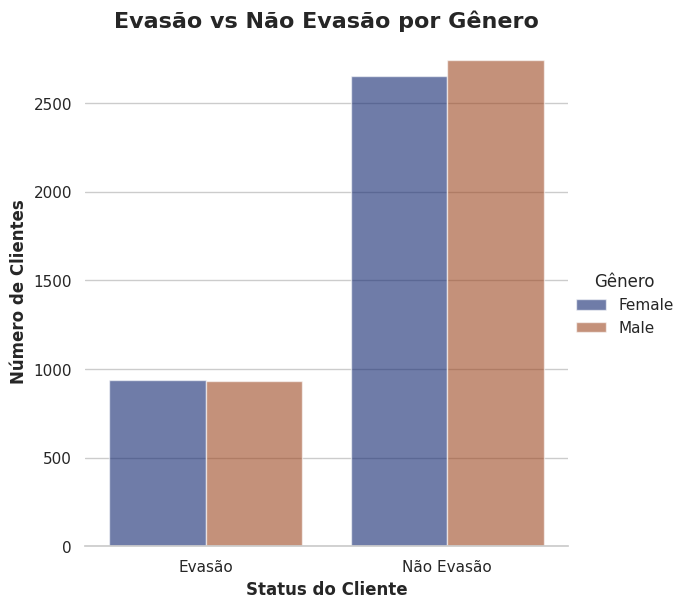

In [107]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=distri_genero,
    kind="bar",
    x='Status',
    y='Contagem',
    hue='Genero',
    errorbar="sd",
    palette="dark",
    alpha=.6,
    height=6,
)

g.legend.set_title("Gênero")
g.despine(left=True)
g.set_axis_labels(
    "Status do Cliente",
    "Número de Clientes",
    fontweight='bold'
)
g.set_xticklabels(["Evasão", "Não Evasão"])
plt.title(
    'Evasão vs Não Evasão por Gênero',
    fontsize=16,
    fontweight='bold'
)


plt.show()

## Por Tipo de Contrato

In [112]:
df_novo.query('Evasao == 1').groupby(['Tipo_Contrato', 'Metodo_Pagamento']).size().reset_index()

,Tipo_Contrato,Metodo_Pagamento,0
0,Month-to-month,Bank transfer (automatic),201
1,Month-to-month,Credit card (automatic),178
2,Month-to-month,Electronic check,994
3,Month-to-month,Mailed check,282
4,One year,Bank transfer (automatic),38
5,One year,Credit card (automatic),41
6,One year,Electronic check,64
7,One year,Mailed check,23
8,Two year,Bank transfer (automatic),19
9,Two year,Credit card (automatic),13


In [158]:
pd.crosstab(df_novo['Tipo_Contrato'], df_novo['Evasao'])

Evasao,0,1
Tipo_Contrato,,
Month-to-month,2350,1655
One year,1353,166
Two year,1695,48


In [159]:
df_tipocontrato = pd.crosstab(df_novo['Tipo_Contrato'], df_novo['Evasao'])

In [160]:
df_tipocontrato = pd.crosstab(df_novo['Tipo_Contrato'], df_novo['Evasao']).reset_index()

In [161]:
df_tipocontrato.columns

Index(['Tipo_Contrato', 0, 1], dtype='object', name='Evasao')

In [162]:
df_tipocontrato.rename(columns={0:'Não_Evasao', 1:'Evasao'}, inplace=True)

In [163]:
df_tipocontrato_percentual = df_tipocontrato.copy()

In [164]:
df_tipocontrato = df_tipocontrato.melt(id_vars='Tipo_Contrato',
                  var_name='Status',
                  value_name='Contagem')

In [165]:
df_tipocontrato

,Tipo_Contrato,Status,Contagem
0,Month-to-month,Não_Evasao,2350
1,One year,Não_Evasao,1353
2,Two year,Não_Evasao,1695
3,Month-to-month,Evasao,1655
4,One year,Evasao,166
5,Two year,Evasao,48


Grafico ilustrativo

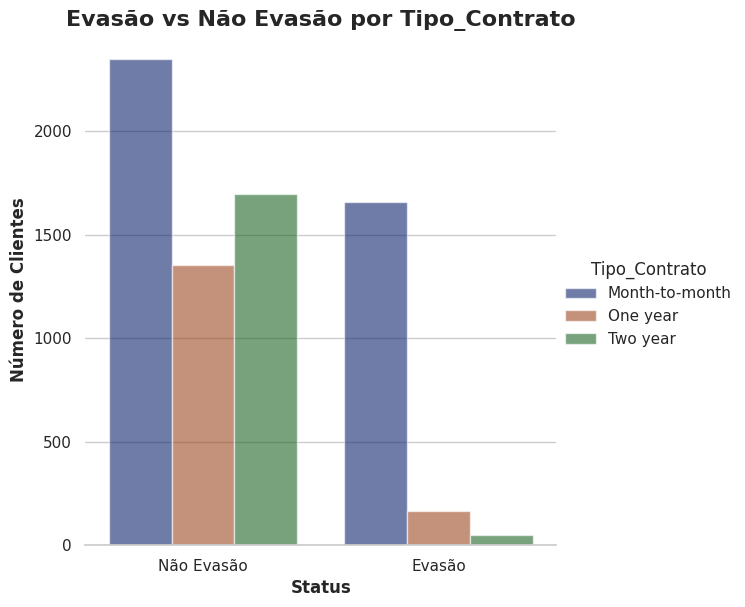

In [166]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_tipocontrato,
    kind="bar",
    x='Status',
    y='Contagem',
    hue='Tipo_Contrato',
    errorbar="sd",
    palette="dark",
    alpha=.6,
    height=6,
)

g.legend.set_title("Tipo_Contrato")
g.despine(left=True)
g.set_axis_labels(
    "Status",
    "Número de Clientes",
    fontweight='bold'
)
g.set_xticklabels(["Não Evasão", "Evasão"])
plt.title(
    'Evasão vs Não Evasão por Tipo_Contrato',
    fontsize=16,
    fontweight='bold'
)


plt.show()

Com o seguinte gráfico conseguimos ver que a maioria das evasões quanto ao `Tipo de Contrato` está para os clientes com o `Tipo de contrato mês por mês` que por sinal a maior parte dos clientes possuem essse tipo de Contrato, diferente dos por ano ou dois anos, esses apresentam uma evasão muito baixa.

In [167]:
df_tipocontrato_percentual

Evasao,Tipo_Contrato,Não_Evasao,Evasao
0,Month-to-month,2350,1655
1,One year,1353,166
2,Two year,1695,48


In [169]:
df_tipocontrato_percentual['Percentagem'] = round(df_tipocontrato_percentual['Evasao'] / (df_tipocontrato_percentual['Evasao'] + df_tipocontrato_percentual['Não_Evasao']) * 100, 2)

In [170]:
df_tipocontrato_percentual

Evasao,Tipo_Contrato,Não_Evasao,Evasao,Percentagem
0,Month-to-month,2350,1655,41.32
1,One year,1353,166,10.93
2,Two year,1695,48,2.75


/tmp/ipython-input-183-4138856255.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




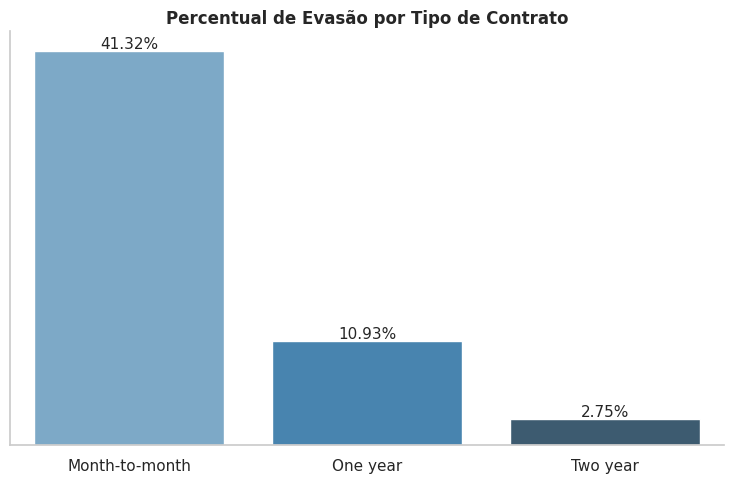

In [183]:
# Criar o catplot
g = sns.catplot(
    data=df_tipocontrato_percentual,
    x='Tipo_Contrato',
    y='Percentagem',
    kind='bar',
    palette='Blues_d',
    height=5,
    aspect=1.5
)

# Acessar o eixo principal para personalizar
ax = g.ax

# Remover o eixo Y
ax.set(yticks=[], ylabel='')

# Adicionar rótulos nas barras
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(
        f'{altura:.2f}%',
        (p.get_x() + p.get_width() / 2, altura),
        ha='center',
        va='bottom',
        fontsize=11
    )

# Título e ajustes
ax.set_title('Percentual de Evasão por Tipo de Contrato', fontweight='bold')
ax.set_xlabel('')
plt.tight_layout()
plt.show()

A análise dos dados de evasão por tipo de contrato revela um padrão claro de comportamento dos clientes da Telecom X:

Clientes com contratos mensais (Month-to-month) apresentam uma alta taxa de evasão (41,32%), representando o maior grupo entre os evasores. Isso indica que a flexibilidade oferecida por esse tipo de contrato pode facilitar a decisão de cancelamento por parte dos clientes.

Por outro lado, clientes com contrato de 1 ano e especialmente contrato de 2 anos apresentam taxas de evasão significativamente menores, com 10,93% e 2,75% respectivamente. Esses dados sugerem que contratos de maior duração estão associados a maior retenção de clientes.

Com base nesses resultados, conclui-se que a duração do contrato exerce forte influência na taxa de churn. Estratégias de fidelização, como incentivos para migração de clientes mensais para contratos anuais ou bienais, podem ser eficazes para reduzir significativamente a evasão de clientes.

## Por Metodo de Pagamento

In [184]:
pd.crosstab(df_novo['Metodo_Pagamento'], df_novo['Evasao'])

Evasao,0,1
Metodo_Pagamento,,
Bank transfer (automatic),1331,258
Credit card (automatic),1336,232
Electronic check,1374,1071
Mailed check,1357,308


In [196]:
df_tipoPagamento = pd.crosstab(df_novo['Metodo_Pagamento'], df_novo['Evasao']).reset_index()

In [197]:
df_tipoPagamento.rename(columns={0:'Não_Evasao', 1:'Evasao'}, inplace=True)

In [198]:
df_tipoPagamento_Perc = df_tipoPagamento.copy()

In [199]:
df_tipoPagamento = df_tipoPagamento.melt(id_vars='Metodo_Pagamento',
                  var_name='Status',
                  value_name='Contagem')

In [200]:
df_tipoPagamento

,Metodo_Pagamento,Status,Contagem
0,Bank transfer (automatic),Não_Evasao,1331
1,Credit card (automatic),Não_Evasao,1336
2,Electronic check,Não_Evasao,1374
3,Mailed check,Não_Evasao,1357
4,Bank transfer (automatic),Evasao,258
5,Credit card (automatic),Evasao,232
6,Electronic check,Evasao,1071
7,Mailed check,Evasao,308


Gráfico ilustrativo

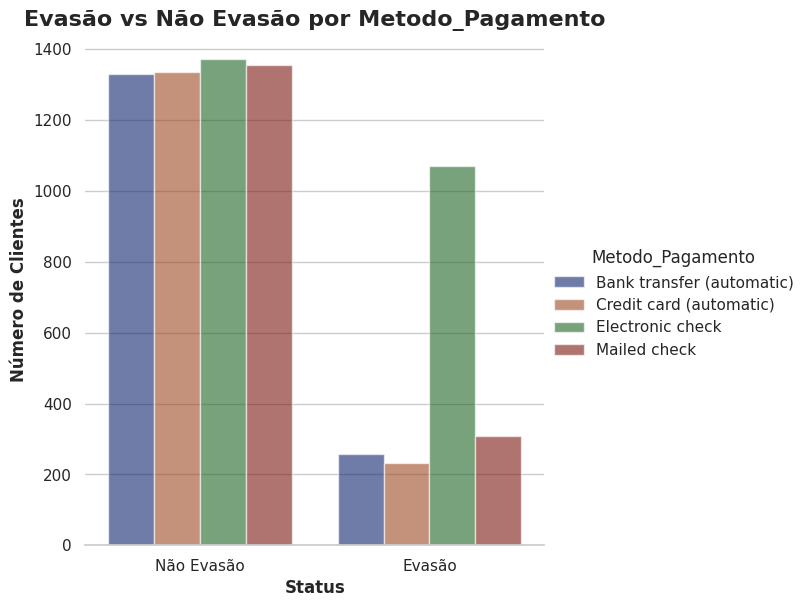

In [201]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_tipoPagamento,
    kind="bar",
    x='Status',
    y='Contagem',
    hue='Metodo_Pagamento',
    errorbar="sd",
    palette="dark",
    alpha=.6,
    height=6,
)

g.legend.set_title("Metodo_Pagamento")
g.despine(left=True)
g.set_axis_labels(
    "Status",
    "Número de Clientes",
    fontweight='bold'
)
g.set_xticklabels(["Não Evasão", "Evasão"])
plt.title(
    'Evasão vs Não Evasão por Metodo_Pagamento',
    fontsize=16,
    fontweight='bold'
)


plt.show()

In [221]:
df_tipoPagamento_Perc['Percentagem'] = round(df_tipoPagamento_Perc['Evasao'] / (df_tipoPagamento_Perc['Evasao'] + df_tipoPagamento_Perc['Não_Evasao']) * 100, 2)

In [222]:
df_tipoPagamento_Perc

Evasao,Metodo_Pagamento,Não_Evasao,Evasao,Percentagem
0,Bank transfer (automatic),1331,258,16.24
1,Credit card (automatic),1336,232,14.80
2,Electronic check,1374,1071,43.80
3,Mailed check,1357,308,18.50


In [224]:
df_tipoPagamento_Perc

Evasao,Metodo_Pagamento,Não_Evasao,Evasao,Percentagem
0,Bank transfer (automatic),1331,258,16.24
1,Credit card (automatic),1336,232,14.80
2,Electronic check,1374,1071,43.80
3,Mailed check,1357,308,18.50


/tmp/ipython-input-225-2897014833.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-225-2897014833.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



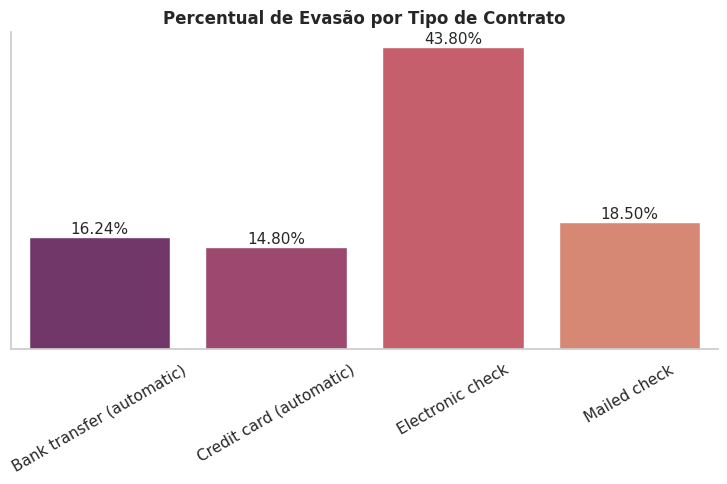

In [225]:
# Criar o catplot
g = sns.catplot(
    data=df_tipoPagamento_Perc,
    x='Metodo_Pagamento',
    y='Percentagem',
    kind='bar',
    palette='flare_r',
    height=5,
    aspect=1.5
)

#sns.color_palette("flare", as_cmap=True)
# Acessar o eixo principal para personalizar
ax = g.ax

# Remover o eixo Y
ax.set(yticks=[], ylabel='')

# Adicionar rótulos nas barras
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(
        f'{altura:.2f}%',
        (p.get_x() + p.get_width() / 2, altura),
        ha='center',
        va='bottom',
        fontsize=11
    )

# Título e ajustes
ax.set_title('Percentual de Evasão por Tipo de Contrato', fontweight='bold')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.tight_layout()
plt.show()

## Pelas Variáveis númericas

In [235]:
pd.crosstab(df_novo['Gasto_Total'], df_novo['Evasao'])

Evasao,0,1
Gasto_Total,,
0.00,11,0
18.80,1,0
18.85,1,1
18.90,2,0
19.00,1,0
...,...,...
8564.75,1,0
8594.40,1,0
8670.10,1,0


In [113]:
df_novo.head()

,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_De_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Gasto_Mensal,Gasto_Total,Gasto_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


#📄Relatorio Final